# Ford Go Bike Communication

In this project I performed an exploratory analysis on data provided by Ford GoBike, a bike-share system provider, using Python visualization techniques. The goal is to figure out what variables possess the most influential power on a bike sharing service. I did the analysis on 2019 year data

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import glob
%matplotlib inline

### Loading the dataset

In [2]:
files = glob.glob("data/*.csv")
frames=[]
for file in files:
    frames.append(pd.read_csv(file, index_col=None, header=0))

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/abdulrahman/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = pd.concat(frames, axis=0, ignore_index=True)

In [4]:
# save new dataset
df.to_csv('bike.csv', index=False)

In [5]:
df = pd.read_csv('bike.csv')

In [6]:
df.head()

duration_sec                start_time                  end_time  \
0         80825  2019-01-31 17:57:44.6130  2019-02-01 16:24:49.8640   
1         65900  2019-01-31 20:58:33.8860  2019-02-01 15:16:54.1730   
2         62633  2019-01-31 18:06:52.9240  2019-02-01 11:30:46.5300   
3         44680  2019-01-31 19:46:09.7190  2019-02-01 08:10:50.3180   
4         60709  2019-01-31 14:19:01.5410  2019-02-01 07:10:51.0650   

   start_station_id           start_station_name  start_station_latitude  \
0             229.0    Foothill Blvd at 42nd Ave               37.775745   
1               4.0  Cyril Magnin St at Ellis St               37.785881   
2             245.0       Downtown Berkeley BART               37.870139   
3              85.0      Church St at Duboce Ave               37.770083   
4              16.0      Steuart St at Market St               37.794130   

   start_station_longitude  end_station_id              end_station_name  \
0              -122.213037           196.0       Grand Ave at Perkins St   
1              -122.408915           134.0        Valencia St at 24th St   
2              -122.268422           157.0          65th St at Hollis St   
3              -122.429156            53.0        Grove St at Divisadero   
4              -122.394430            28.0  The Embarcadero at Bryant St   

   end_station_latitude  end_station_longitude  bike_id   user_type  \
0             37.808894            -122.256460     4861  Subscriber   
1             37.752428            -122.420628     5506  Subscriber   
2             37.846784            -122.291376     2717    Customer   
3             37.775946            -122.437777     4557    Customer   
4             37.787168            -122.388098     2100    Customer   

  bike_share_for_all_trip rental_access_method  
0                      No                  NaN  
1                      No                  NaN  
2                      No                  NaN  
3                      No                  NaN  
4                      No                  NaN

In [7]:
df.sample(5)

duration_sec                start_time                  end_time  \
1065715           996  2019-06-28 10:30:03.0400  2019-06-28 10:46:39.5470   
27466             800  2019-01-29 07:44:41.9210  2019-01-29 07:58:02.4310   
1939627          3344  2019-10-30 22:10:10.4370  2019-10-30 23:05:54.5480   
52532             829  2019-01-25 14:47:30.4260  2019-01-25 15:01:20.0570   
1151804           435  2019-06-14 17:33:40.8670  2019-06-14 17:40:56.1400   

         start_station_id                                start_station_name  \
1065715             114.0                        Rhode Island St at 17th St   
27466                16.0                           Steuart St at Market St   
1939627             460.0               Terry Francois Blvd at Warriors Way   
52532                21.0  Montgomery St BART Station (Market St at 2nd St)   
1151804              50.0                             2nd St at Townsend St   

         start_station_latitude  start_station_longitude  end_station_id  \
1065715               37.764478              -122.402570            24.0   
27466                 37.794130              -122.394430           104.0   
1939627               37.769095              -122.386333            11.0   
52532                 37.789625              -122.400811           368.0   
1151804               37.780526              -122.390288            21.0   

                                         end_station_name  \
1065715                             Spear St at Folsom St   
27466                                   4th St at 16th St   
1939627                            Davis St at Jackson St   
52532                                Myrtle St at Polk St   
1151804  Montgomery St BART Station (Market St at 2nd St)   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1065715             37.789677            -122.390428      920  Subscriber   
27466               37.767045            -122.390833     5306  Subscriber   
1939627             37.797280            -122.398436    12474    Customer   
52532               37.785434            -122.419622     5242  Subscriber   
1151804             37.789625            -122.400811     1088  Subscriber   

        bike_share_for_all_trip rental_access_method  
1065715                      No                  NaN  
27466                        No                  NaN  
1939627                      No                  NaN  
52532                        No                  NaN  
1151804                      No                  NaN

In [8]:
# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 286.9+ MB


In [9]:
# more information about the dataset
df.describe().transpose()

count          mean            std         min  \
duration_sec             2506983.0    807.648330    1974.713981   60.000000   
start_station_id         2426249.0    146.504749     122.317102    3.000000   
start_station_latitude   2506983.0     37.765064       0.136370    0.000000   
start_station_longitude  2506983.0   -122.349919       0.308965 -122.514299   
end_station_id           2424081.0    142.704424     121.429649    3.000000   
end_station_latitude     2506983.0     37.764219       0.239289    0.000000   
end_station_longitude    2506983.0   -122.345908       0.708042 -122.514287   
bike_id                  2506983.0  27898.327162  114606.651187    4.000000   

                                 25%          50%          75%        max  
duration_sec              359.000000   571.000000   887.000000  912110.00  
start_station_id           47.000000   105.000000   243.000000     498.00  
start_station_latitude     37.769305    37.780526    37.795393      45.51  
start_station_longitude  -122.413004  -122.398285  -122.291415       0.00  
end_station_id             43.000000   101.000000   239.000000     498.00  
end_station_latitude       37.770030    37.780760    37.795873      45.51  
end_station_longitude    -122.411726  -122.398113  -122.293400       0.00  
bike_id                  1952.000000  4420.000000  9682.000000  999941.00

In [10]:
# check Null/Nan Values
missing_values = df.isna().sum()
df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

In [11]:
# Check for duplicates
df[df.duplicated()==True]

Empty DataFrame
Columns: [duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, rental_access_method]
Index: []

## Cleaning

1. Columns that have missing values:
    - start_station_id
    - start_station_name
    - end_station_id
    - end_station_name


2. Convert start_time and end_time to timestamp format.


3. For further analysis start_time and end_time need to be separated into hour, day and month columns.


4. Some columns need to be changed into another type
    - user_type
    - start_station_id
    - end_station_id
    - duration_mins
    - bike_id


5. Drop unwanted columns for analysis.

1. Deal with columns that have missing values

In [12]:
df.drop('rental_access_method', axis=1, inplace=True)
df.sample(5)

duration_sec                start_time                  end_time  \
1953118           727  2019-10-29 12:40:14.1720  2019-10-29 12:52:22.1050   
610157            541  2019-03-04 17:13:13.3600  2019-03-04 17:22:15.0490   
2060874           341  2019-10-15 08:57:37.9680  2019-10-15 09:03:19.4830   
1385457           321  2019-07-06 18:26:17.5420  2019-07-06 18:31:38.9430   
216450            123  2019-02-25 18:27:00.2850  2019-02-25 18:29:03.4220   

         start_station_id                                 start_station_name  \
1953118             389.0                                Taylor St at 9th St   
610157                5.0       Powell St BART Station (Market St at 5th St)   
2060874             465.0  San Francisco Caltrain Station (King St at 4th...   
1385457              98.0                             Valencia St at 16th St   
216450              223.0                     16th St Mission BART Station 2   

         start_station_latitude  start_station_longitude  end_station_id  \
1953118               37.353062              -121.891937           308.0   
610157                37.783899              -122.408445            56.0   
2060874               37.776329              -122.394438            27.0   
1385457               37.765052              -122.421866           356.0   
216450                37.764765              -122.420091           110.0   

                                         end_station_name  \
1953118                                  San Pedro Square   
610157                                      Koshland Park   
2060874                           Beale St at Harrison St   
1385457                       Valencia St at Clinton Park   
216450   17th & Folsom Street Park (17th St at Folsom St)   

         end_station_latitude  end_station_longitude  bike_id   user_type  \
1953118             37.336802            -121.894090     1256  Subscriber   
610157              37.773414            -122.427317     4938  Subscriber   
2060874             37.788059            -122.391865     9949  Subscriber   
1385457             37.769188            -122.422285     2267  Subscriber   
216450              37.763708            -122.415204     4902  Subscriber   

        bike_share_for_all_trip  
1953118                      No  
610157                       No  
2060874                      No  
1385457                      No  
216450                       No

In [13]:
# missing values is small percentage of total data, so I will drop it
df.dropna(inplace=True)

In [14]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [15]:
df.sample(5)

duration_sec                start_time                  end_time  \
2124919           194  2019-10-07 08:08:17.8070  2019-10-07 08:11:32.6420   
1575356           581  2019-08-21 16:16:39.7660  2019-08-21 16:26:20.9590   
2297074           347  2019-11-08 19:53:40.9170  2019-11-08 19:59:27.9410   
1565152           990  2019-08-22 18:16:31.3900  2019-08-22 18:33:01.8120   
1066631           372  2019-06-28 09:00:58.3610  2019-06-28 09:07:10.8670   

         start_station_id                              start_station_name  \
2124919              30.0  San Francisco Caltrain (Townsend St at 4th St)   
1575356              80.0                           Townsend St at 5th St   
2297074             179.0                        Telegraph Ave at 27th St   
1565152              13.0                  Commercial St at Montgomery St   
1066631              99.0                            Folsom St at 15th St   

         start_station_latitude  start_station_longitude  end_station_id  \
2124919               37.776598              -122.395282            90.0   
1575356               37.775235              -122.397437            77.0   
2297074               37.816073              -122.267886             7.0   
1565152               37.794231              -122.402923            97.0   
1066631               37.767037              -122.415442           109.0   

               end_station_name  end_station_latitude  end_station_longitude  \
2124919   Townsend St at 7th St             37.771058            -122.402717   
1575356    11th St at Natoma St             37.773507            -122.416040   
2297074     Frank H Ogawa Plaza             37.804562            -122.271738   
1565152   14th St at Mission St             37.768265            -122.420110   
1066631  17th St at Valencia St             37.763316            -122.421904   

         bike_id   user_type bike_share_for_all_trip  
2124919     9585  Subscriber                      No  
1575356     9940  Subscriber                     Yes  
2297074     9724  Subscriber                      No  
1565152     9665  Subscriber                      No  
1066631     1134  Subscriber                      No

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 259.0+ MB


2. Convert start_time and end_time to datetime format.
3. For further analysis start_time and end_time need to be separated into hour, day and month columns.

In [17]:
# change to datetime format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [18]:
# insert new columns
df.insert(0, 'duration_mins', (df.duration_sec/60))
df.insert(1, 'start_day', (df.start_time.dt.strftime('%a')))
df.insert(2, 'end_day', (df.end_time.dt.strftime('%a')))
df.insert(3, 'start_month', (df.start_time.dt.strftime('%b')))
df.insert(4, 'end_month', (df.end_time.dt.strftime('%b')))
df.insert(5, 'start_hour', (df.start_time.dt.hour))
df.insert(6, 'end_hour', (df.end_time.dt.hour))

In [19]:
df.head()

duration_mins start_day end_day start_month end_month  start_hour  \
0    1347.083333       Thu     Fri         Jan       Feb          17   
1    1098.333333       Thu     Fri         Jan       Feb          20   
2    1043.883333       Thu     Fri         Jan       Feb          18   
3     744.666667       Thu     Fri         Jan       Feb          19   
4    1011.816667       Thu     Fri         Jan       Feb          14   

   end_hour  duration_sec              start_time                end_time  \
0        16         80825 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864   
1        15         65900 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173   
2        11         62633 2019-01-31 18:06:52.924 2019-02-01 11:30:46.530   
3         8         44680 2019-01-31 19:46:09.719 2019-02-01 08:10:50.318   
4         7         60709 2019-01-31 14:19:01.541 2019-02-01 07:10:51.065   

   ...           start_station_name start_station_latitude  \
0  ...    Foothill Blvd at 42nd Ave              37.775745   
1  ...  Cyril Magnin St at Ellis St              37.785881   
2  ...       Downtown Berkeley BART              37.870139   
3  ...      Church St at Duboce Ave              37.770083   
4  ...      Steuart St at Market St              37.794130   

   start_station_longitude  end_station_id              end_station_name  \
0              -122.213037           196.0       Grand Ave at Perkins St   
1              -122.408915           134.0        Valencia St at 24th St   
2              -122.268422           157.0          65th St at Hollis St   
3              -122.429156            53.0        Grove St at Divisadero   
4              -122.394430            28.0  The Embarcadero at Bryant St   

  end_station_latitude  end_station_longitude  bike_id   user_type  \
0            37.808894            -122.256460     4861  Subscriber   
1            37.752428            -122.420628     5506  Subscriber   
2            37.846784            -122.291376     2717    Customer   
3            37.775946            -122.437777     4557    Customer   
4            37.787168            -122.388098     2100    Customer   

  bike_share_for_all_trip  
0                      No  
1                      No  
2                      No  
3                      No  
4                      No  

[5 rows x 21 columns]

In [20]:
# calculate the distance in miles between start and end stations
df['distance_miles'] = 3958.756 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(df['end_station_latitude']) - \
                    np.radians(df['start_station_latitude']))/2)**2 + np.cos(np.radians(df['start_station_latitude'])) * \
                    np.cos(np.radians(df['end_station_latitude'])) * np.sin((np.radians(df['end_station_longitude']) - \
                    np.radians(df['start_station_longitude']))/2)**2))

In [21]:
df.sample(5)

duration_mins start_day end_day start_month end_month  start_hour  \
810167        4.050000       Sun     Sun         Apr       Apr          15   
921433       13.283333       Thu     Thu         May       May           8   
326430       37.733333       Fri     Fri         Feb       Feb          17   
2184996       4.766667       Mon     Mon         Nov       Nov          17   
2109201       7.283333       Tue     Tue         Oct       Oct          18   

         end_hour  duration_sec              start_time  \
810167         15           243 2019-04-07 15:17:24.810   
921433          8           797 2019-05-23 08:42:29.948   
326430         17          2264 2019-02-08 17:03:15.836   
2184996        17           286 2019-11-25 17:19:36.241   
2109201        19           437 2019-10-08 18:53:08.739   

                       end_time  ...  start_station_latitude  \
810167  2019-04-07 15:21:28.021  ...               37.783521   
921433  2019-05-23 08:55:46.981  ...               37.794130   
326430  2019-02-08 17:41:00.795  ...               37.802746   
2184996 2019-11-25 17:24:23.108  ...               37.811377   
2109201 2019-10-08 19:00:26.414  ...               37.778742   

        start_station_longitude  end_station_id  \
810167              -122.431158           285.0   
921433              -122.394430            93.0   
326430              -122.413579           139.0   
2184996             -122.265192           197.0   
2109201             -122.392741            22.0   

                                 end_station_name  end_station_latitude  \
810167                 Webster St at O'Farrell St             37.783521   
921433               4th St at Mission Bay Blvd S             37.770407   
326430   Garfield Square (25th St at Harrison St)             37.751017   
2184996               El Embarcadero at Grand Ave             37.808848   
2109201                     Howard St at Beale St             37.789756   

        end_station_longitude  bike_id   user_type  bike_share_for_all_trip  \
810167            -122.431158     6084    Customer                       No   
921433            -122.391198     1661  Subscriber                       No   
326430            -122.411901     4972  Subscriber                       No   
2184996           -122.249680    11724    Customer                       No   
2109201           -122.394643    11667  Subscriber                       No   

        distance_miles  
810167        0.000000  
921433        1.648546  
326430        3.575307  
2184996       0.864625  
2109201       0.768077  

[5 rows x 22 columns]

4. Some columns need to be changed into another type
    - bike_id to object string
    - start_station_id to object string
    - end_station_id to object string
    - duration_mins to int64
    - user_type to category

In [22]:
df.bike_id = df.bike_id.astype(str)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.duration_mins = df.duration_mins.round()
df.duration_mins = df.duration_mins.astype(np.int64)
df.user_type = df.user_type.astype('category')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2355470
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_mins            int64         
 1   start_day                object        
 2   end_day                  object        
 3   start_month              object        
 4   end_month                object        
 5   start_hour               int64         
 6   end_hour                 int64         
 7   duration_sec             int64         
 8   start_time               datetime64[ns]
 9   end_time                 datetime64[ns]
 10  start_station_id         object        
 11  start_station_name       object        
 12  start_station_latitude   float64       
 13  start_station_longitude  float64       
 14  end_station_id           object        
 15  end_station_name         object        
 16  end_station_latitude     float64       
 17  end_station_longitude    fl

5. Drop unwanted columns for analysis.

In [24]:
df.drop('start_time', axis=1, inplace=True)
df.drop('end_time', axis=1, inplace=True)
df.drop('duration_sec', axis=1, inplace=True)

In [25]:
df.sample(5)

duration_mins start_day end_day start_month end_month  start_hour  \
1362333              5       Wed     Wed         Jul       Jul          17   
2297706             21       Fri     Fri         Nov       Nov          18   
101906               9       Fri     Fri         Jan       Jan          10   
1333149             20       Mon     Mon         Jul       Jul          18   
2046552              9       Wed     Wed         Oct       Oct          19   

         end_hour start_station_id             start_station_name  \
1362333        17             81.0             Berry St at 4th St   
2297706        18             16.0        Steuart St at Market St   
101906         11              6.0  The Embarcadero at Sansome St   
1333149        18            126.0                    Esprit Park   
2046552        19            183.0       Telegraph Ave at 19th St   

         start_station_latitude  start_station_longitude end_station_id  \
1362333               37.775880              -122.393170           28.0   
2297706               37.794130              -122.394430          345.0   
101906                37.804770              -122.403234           15.0   
1333149               37.761634              -122.390648          133.0   
2046552               37.808702              -122.269927          197.0   

                                          end_station_name  \
1362333                       The Embarcadero at Bryant St   
2297706                              Hubbell St at 16th St   
101906   San Francisco Ferry Building (Harry Bridges Pl...   
1333149                             Valencia St at 22nd St   
2046552                        El Embarcadero at Grand Ave   

         end_station_latitude  end_station_longitude bike_id   user_type  \
1362333             37.787168            -122.388098    2446  Subscriber   
2297706             37.766483            -122.398279   12075  Subscriber   
101906              37.795392            -122.394203      38    Customer   
1333149             37.755213            -122.420975    3753  Subscriber   
2046552             37.808848            -122.249680    1376  Subscriber   

        bike_share_for_all_trip  distance_miles  
1362333                      No        0.827648  
2297706                      No        1.921775  
101906                       No        0.814211  
1333149                      No        1.715033  
2046552                      No        1.105299

## Dataset structure

### What is the structure of your dataset?

**Columns:**
- duration_mins
- start_day
- end_day
- start_month
- end_month
- start_hour
- end_hour
- distance_miles

### What is/are the main feature(s) of interest in your dataset?
- Understand he number of subscribers/customers in the dataset and which of them are more valuable to the company.

- The time for which the bike is rented on an average and the distance in miles travelled by different classes of users.

- Understand whether the start time of rentals differ between subscribers and customers.

- The locations which sees the most rentals among different classes of users. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- Distance in Miles
- Duration in Mins
- Start Month, Day
- Hour and Latitude and Longitude
- Bike share for all trip data
- User Type
- Start Station Names

## Univariate Exploration

## Distribution of Rental duration in minutes

In [26]:
sns.set_style('darkgrid')

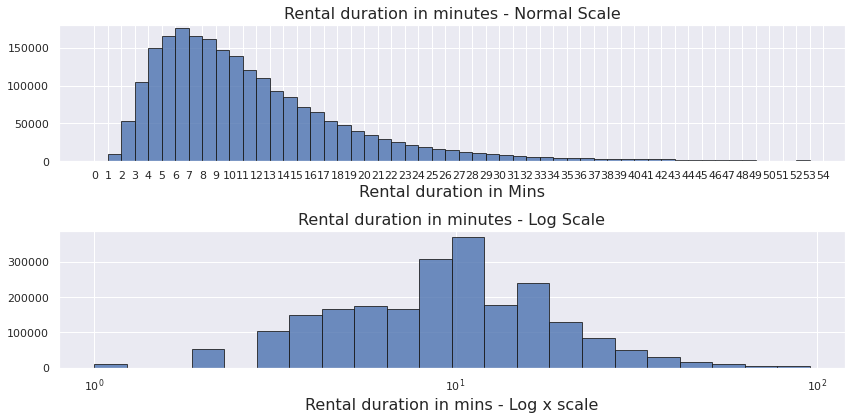

In [43]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 6])
ax[0].hist(data = df, x='duration_mins', bins=np.arange(0, df.duration_mins.mean()+40, 1), color='b', alpha=0.8, edgecolor='k')
ax[1].hist(data = df, x = 'duration_mins', bins=10 ** np.arange(0, 2.0, 0.09), color='b', alpha=0.8, edgecolor='k')
plt.xscale('log')
plt.sca(ax[0])
plt.xticks(np.arange(0, 55, 1))
plt.title("Rental duration in minutes - Normal Scale", fontsize=16)
plt.ylim(0, 180000)
plt.xlabel("Rental duration in minutes", fontsize=16)
plt.sca(ax[1])
plt.title("Rental duration in minutes - Log Scale", fontsize=16)
plt.xlabel("Rental duration in minutes - Log x scale", fontsize=16)
plt.tight_layout()
plt.show()

- From Normal Plot: Distribution of rental duration is right-skewed, there are rentals for about an hour or so by users.

- From the Log Plot: Rental duration is roughly bimodal.

## Distribution of Customer vs Subscribers

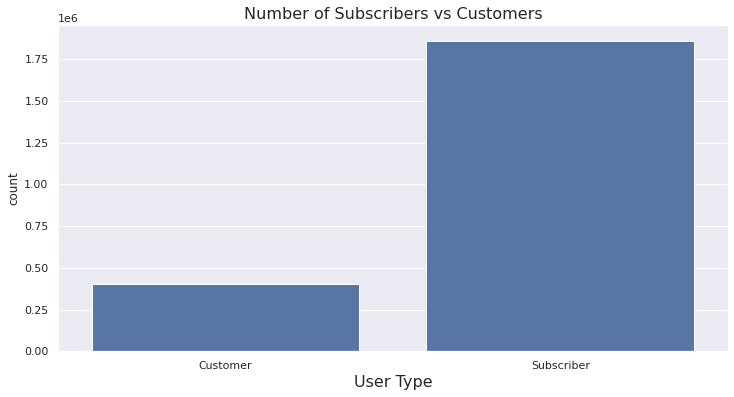

In [50]:
sns.countplot(data = df, x = 'user_type', color='b')
sns.set(rc={'figure.figsize':(12, 6)})
plt.title("Number of Subscribers vs Customers", fontsize=16)
plt.xlabel("User Type", fontsize=16)
plt.show()

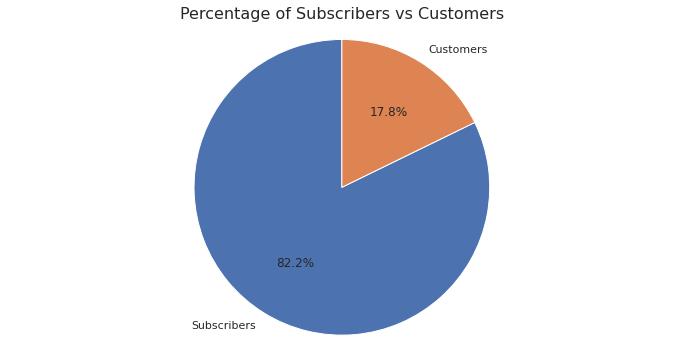

In [45]:
sub_count = df.user_type.value_counts()[0]
cust_count = df.user_type.value_counts()[1]
total = sub_count+cust_count
plt.pie([sub_count/total*100, cust_count/total*100], autopct='%1.1f%%', labels = ['Subscribers', 'Customers'], startangle=90)
plt.title('Percentage of Subscribers vs Customers', fontsize=16)
plt.axis('equal')
plt.show()

- The number of subscribers is larger than number of customers. 82.2% of users are Subscribers and 17.8% are Customers. 

## Day, Month and Hour vs Rentals

In [46]:
days, months = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], df.start_month.unique()

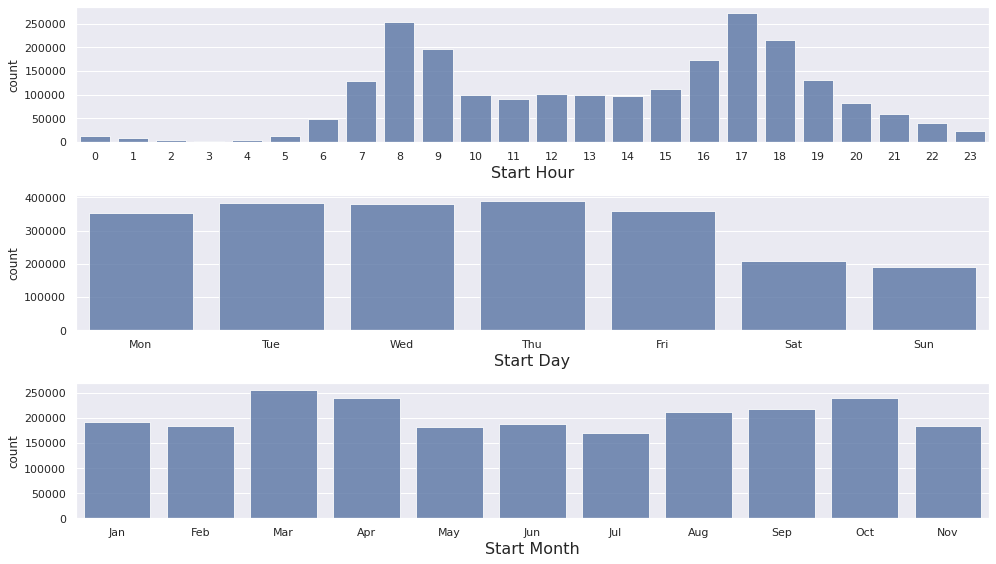

In [54]:
# Distribution of rentals across days of the week, months and hour
fig, ax = plt.subplots(nrows=3, figsize = [14, 8])
sns.countplot(data = df, x = 'start_hour', color = 'b', alpha=0.8, ax = ax[0])
plt.sca(ax[0])
plt.xlabel("Start Hour", fontsize=16)
sns.countplot(data = df, x = 'start_day', color = 'b', alpha=0.8, ax = ax[1], order=days)
plt.sca(ax[1])
plt.xlabel("Start Day", fontsize=16)
sns.countplot(data = df, x = 'start_month', color = 'b', alpha=0.8, ax = ax[2])
plt.sca(ax[2])
plt.xlabel("Start Month", fontsize=16)
plt.tight_layout()
plt.show()

- The peak hours of rentals are 7-9 am and 4-6 pm 
- The least number of rentals are on Saturday and Sunday
- The most rentals are from August till October, March and April

## How many enrolled in bike sharing scheme ?

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


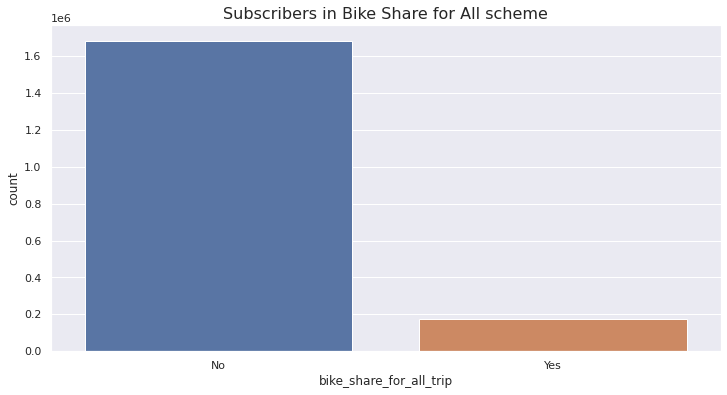

In [55]:
sns.countplot(df[df.user_type == 'Subscriber'].bike_share_for_all_trip)
plt.title("Subscribers in Bike Share for All scheme", fontsize=16)
plt.show()

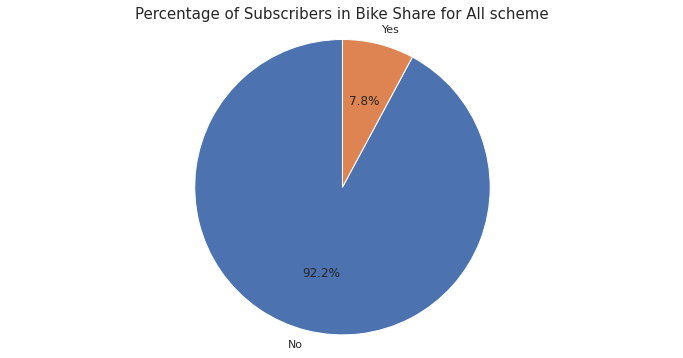

In [56]:
no_count = df.bike_share_for_all_trip.value_counts()[0]
yes_count = df.bike_share_for_all_trip.value_counts()[1]
plt.pie([no_count/(no_count+yes_count)*100, yes_count/(no_count+yes_count)*100], autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90)
plt.title("Percentage of Subscribers in Bike Share for All scheme", fontsize=15)
plt.axis('equal')
plt.show()

- 92.2% of subscribers are not eligible for Bike Share for All schemes and only 7.8% are eligible.
- There are no customers who are in the Bike Share for all trip scheme. 

## Distance travelled by Subscribers and Customers

In [57]:
sub_dist = df[df.user_type == 'Subscriber'].distance_miles.sum()
cust_dist = df[df.user_type == 'Customer'].distance_miles.sum()
tot_dist = df.distance_miles.sum()

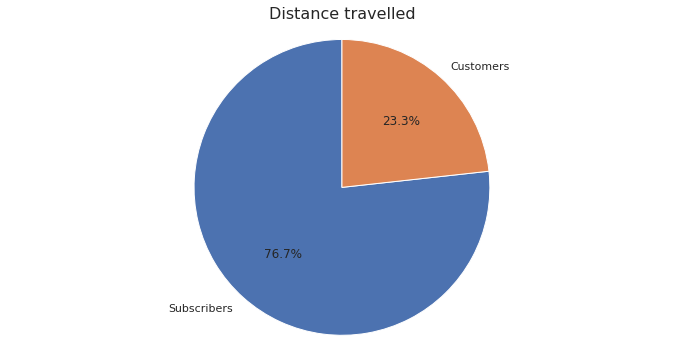

In [58]:
plt.pie([sub_dist/tot_dist*100, cust_dist/tot_dist*100], autopct='%1.1f%%', labels=['Subscribers', 'Customers'], startangle=90)
plt.title("Distance travelled", fontsize=16)
plt.axis('equal')
plt.show()

- Distance traveled by subscribers travel 76.7% of the total distance and 23.3% by customers

## Percentage of Rental duration for Subscribers and Customers

In [59]:
sub_dur = df[df.user_type == 'Subscriber'].duration_mins.sum()
cust_dur = df[df.user_type == 'Customer'].duration_mins.sum()
tot_dur = df.distance_miles.sum()

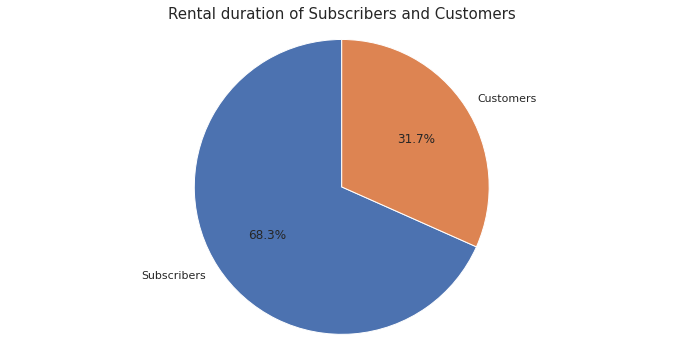

In [60]:
plt.pie([sub_dur/tot_dur*100, cust_dur/tot_dur*100], autopct='%1.1f%%', labels=['Subscribers', 'Customers'], startangle=90)
plt.axis('equal')
plt.title('Rental duration of Subscribers and Customers', fontsize=15)
plt.show()

- Subscribers rent 68.3% of the total time and this percentage is not as large as the Distance case.
- Subscribers rent for less duration but travel more miles compared to Customers. 

## Bivariate Exploration

## Distribution of rental duration in minutes (subscribers)

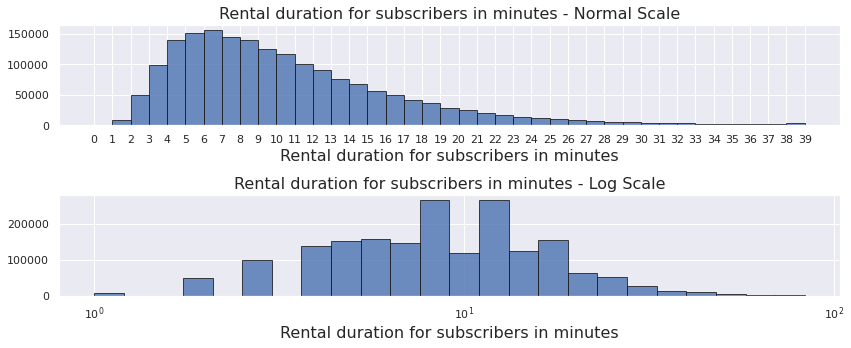

In [71]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])
sub = df[df.user_type=='Subscriber']
ax[0].hist(sub.duration_mins, bins=np.arange(0, 40, 1), color='b', alpha=0.8, edgecolor='k')
ax[1].hist(sub.duration_mins, bins=10 ** np.arange(0, 2, 0.08), color='b', alpha=0.8, edgecolor='k')
plt.xscale('log')
plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.title("Rental duration for subscribers in minutes - Normal Scale", fontsize=16)
plt.xlabel("Rental duration for subscribers in minutes", fontsize=16)
plt.sca(ax[1])
plt.title("Rental duration for subscribers in minutes - Log Scale", fontsize=16)
plt.xlabel("Rental duration for subscribers in minutes", fontsize=16)
plt.tight_layout()
plt.show()

- From the Normal plot: Most subscribers are renting the bikes for 4-11 minutes. 
- From Log Scale: it is bimodal. 

## Distribution of rental duration in minutes (customers)

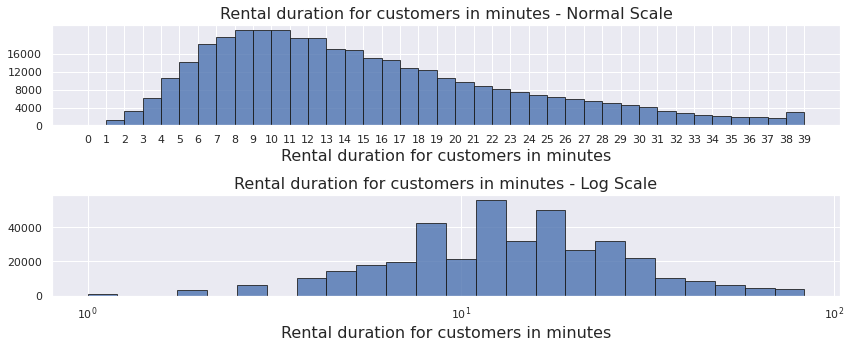

In [72]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])
sub = df[df.user_type=='Customer']
ax[0].hist(sub.duration_mins, bins=np.arange(0, 40, 1), color='b', alpha=0.8, edgecolor='k')
ax[1].hist(sub.duration_mins, bins=10 ** np.arange(0, 2, 0.08), color='b', alpha=0.8, edgecolor='k')
plt.xscale('log')
plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.yticks(np.arange(0, 18000, 4000))
plt.title("Rental duration for customers in minutes - Normal Scale", fontsize=16)
plt.xlabel("Rental duration for customers in minutes", fontsize=16)
plt.sca(ax[1])
plt.title("Rental duration for customers in minutes - Log Scale", fontsize=16)
plt.xlabel("Rental duration for customers in minutes", fontsize=16)
plt.tight_layout()
plt.show()

- From Normal Scale: Most Customers are renting the bikes for 7-13 minutes.
- From Log Scale: it is bimodal. 

## Distribution of rental duration in minutes (all users)

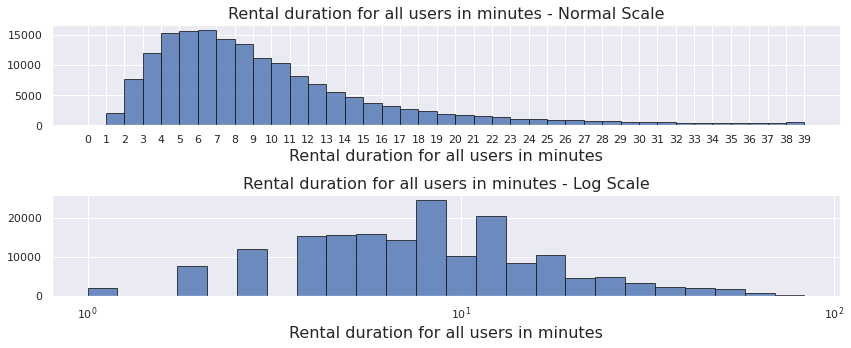

In [74]:
fig, ax = plt.subplots(nrows=2, figsize = [12, 5])
sub = df[df.bike_share_for_all_trip=='Yes']
ax[0].hist(sub.duration_mins, bins=np.arange(0, 40, 1), color='b', alpha=0.8, edgecolor='k')
plt.sca(ax[0])
plt.xticks(np.arange(0, 40, 1))
plt.title("Rental duration for all users in minutes - Normal Scale", fontsize=16)
plt.xlabel("Rental duration for all users in minutes", fontsize=16)
ax[1].hist(sub.duration_mins, bins=10 ** np.arange(0, 2, 0.08), color='b', alpha=0.8, edgecolor='k')
plt.sca(ax[1])
plt.xscale('log')
plt.title("Rental duration for all users in minutes - Log Scale", fontsize=16)
plt.xlabel("Rental duration for all users in minutes", fontsize=16)
plt.tight_layout()
plt.show()

- From Normal Scale: Most Customers are renting the bikes for 4-8 minutes.
- From Log Scale: it is bimodal. 

## Distance travelled in miles by Subscribers

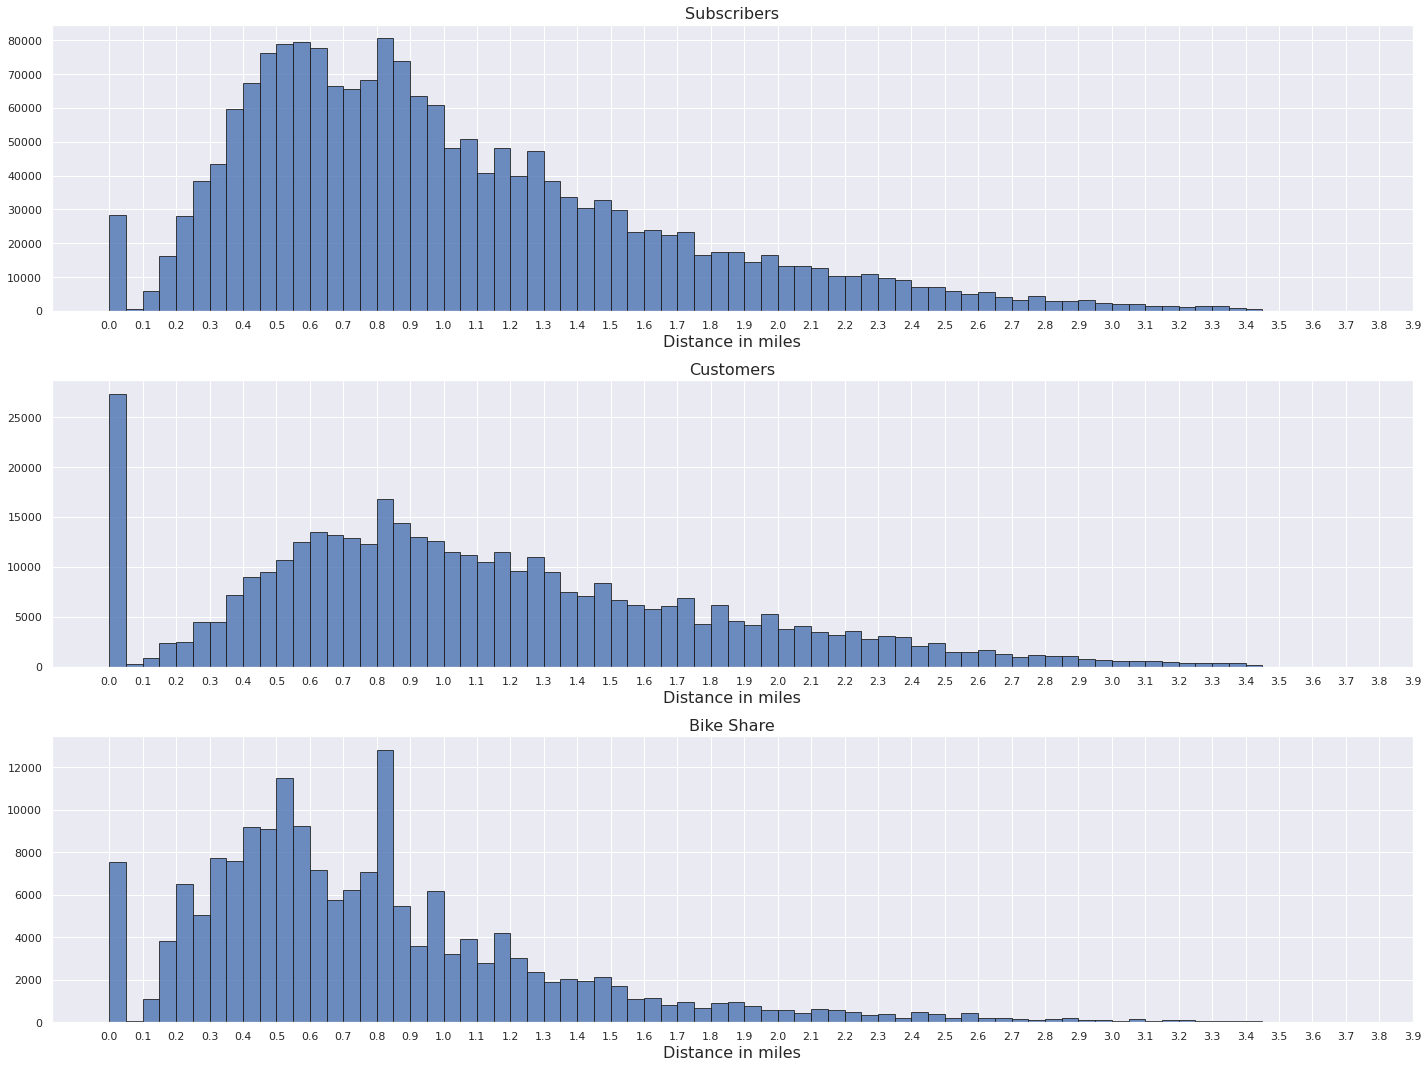

In [81]:
fig, ax = plt.subplots(nrows=3, figsize = [20, 15])
sub = df[df.user_type=='Subscriber']
bins = np.arange(0, 3.5, 0.05)
ax[0].hist(sub.distance_miles, bins=bins, color='b', alpha=0.8, edgecolor='k')
plt.sca(ax[0])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Subscribers", fontsize=16)
plt.xlabel("Distance in miles", fontsize=16)
cust = df[df.user_type=='Customer']
ax[1].hist(cust.distance_miles, bins=bins,  color='b', alpha=0.8, edgecolor='k')
plt.sca(ax[1])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Customers", fontsize=16)
plt.xlabel("Distance in miles", fontsize=16)
ax[2].hist(df[df.bike_share_for_all_trip == 'Yes'].distance_miles, bins=bins,  color='b', alpha=0.8, edgecolor='k')
plt.sca(ax[2])
plt.xticks(np.arange(0, 4, 0.1))
plt.title("Bike Share", fontsize=16)
plt.xlabel("Distance in miles", fontsize=16)
plt.tight_layout()
plt.show()

- Most Subscribers travel a distance 0.4-0.6 and 0.8-0.9 miles, they use it for transportation.
- Huge number of customers are travelling less than 0.1 miles, they use it for fun. 
- For Bike share: they are using the bikes for day-to-day usage. 

## Duration in mins of Rentals for Subscribers and Customers

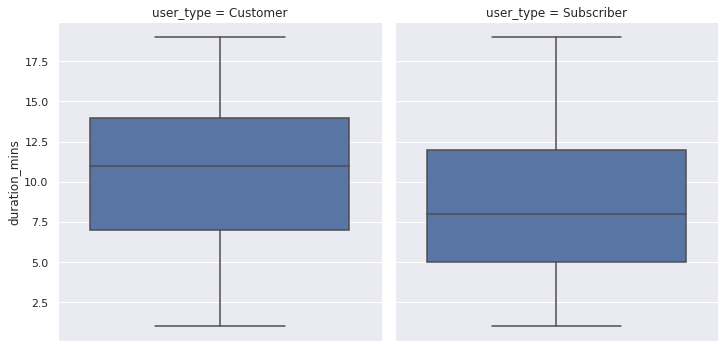

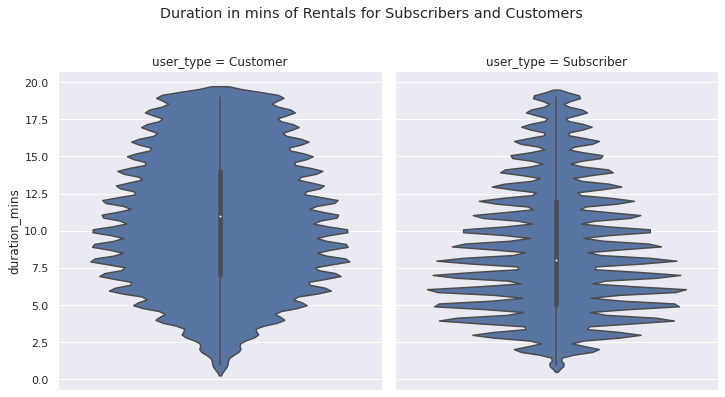

In [83]:
data = df[df.duration_mins < 20]
sns.catplot(data=data, y='duration_mins', col="user_type", kind='box')
sns.catplot(data=data, y='duration_mins', col="user_type", kind='violin')
plt.suptitle("Duration in minutes of Rentals for Subscribers and Customers", y=1.1)
plt.show()

- Customers rent bikes for longer durations than Subscribers. 
- From violin plots the customers rent the bikes over a wide variety of ranges and for about 7.5 to 12.5 minutes.

## Stations with the most customers rentals

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


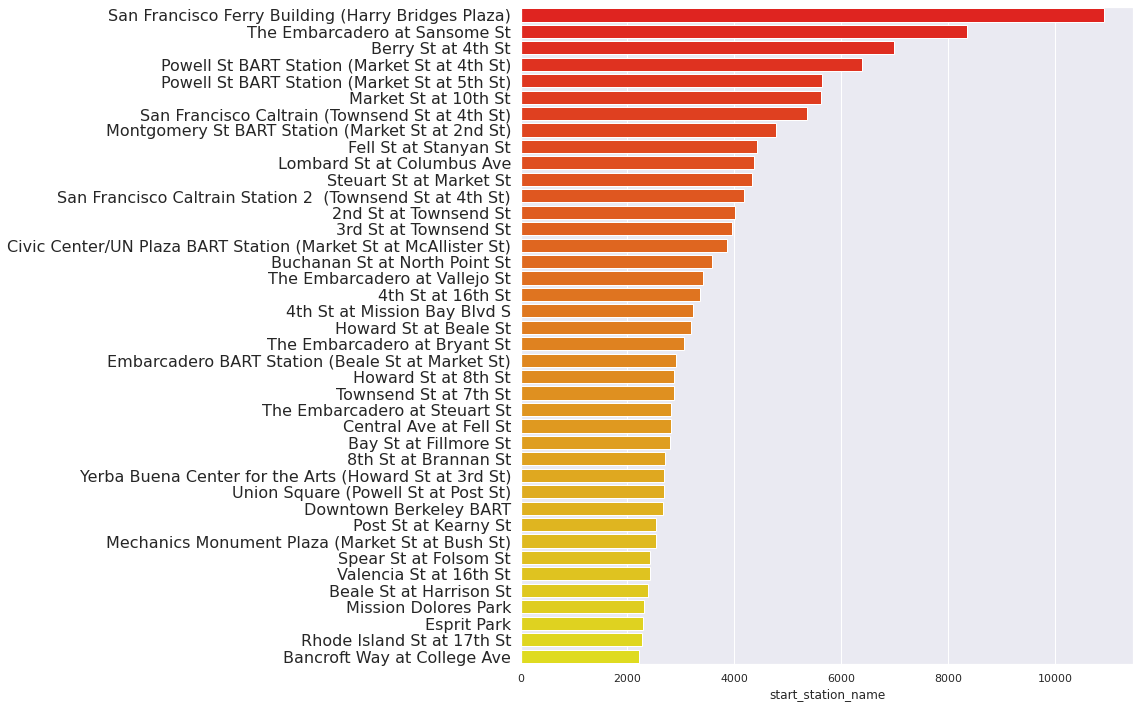

In [99]:
a = df[df.user_type == 'Customer'].start_station_name.value_counts()[:40]
sns.barplot(a, a.index, palette='autumn')
sns.set(rc={'figure.figsize':(16, 10)})
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- From this data you can know where to concentrate your resources. 
- The top three stations are well known as tourist locations that's why it is popular.

## Stations with the most subscribers rentals

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


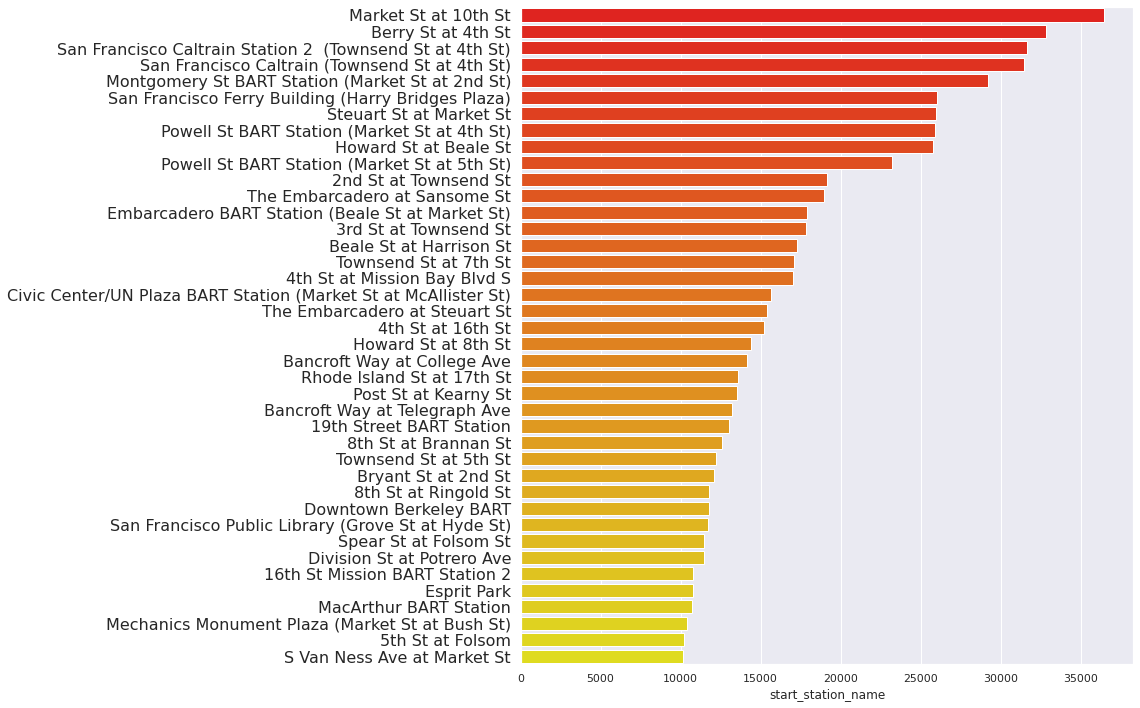

In [98]:
a = df[df.user_type == 'Subscriber'].start_station_name.value_counts()[:40]
sns.barplot(a, a.index, palette='autumn')
sns.set(rc={'figure.figsize':(16, 10)})
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- Top locations are different from the Customers locations. as they use it for transportation, e.g: the first two are train stations.

## Stations with the most bike share rentals

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


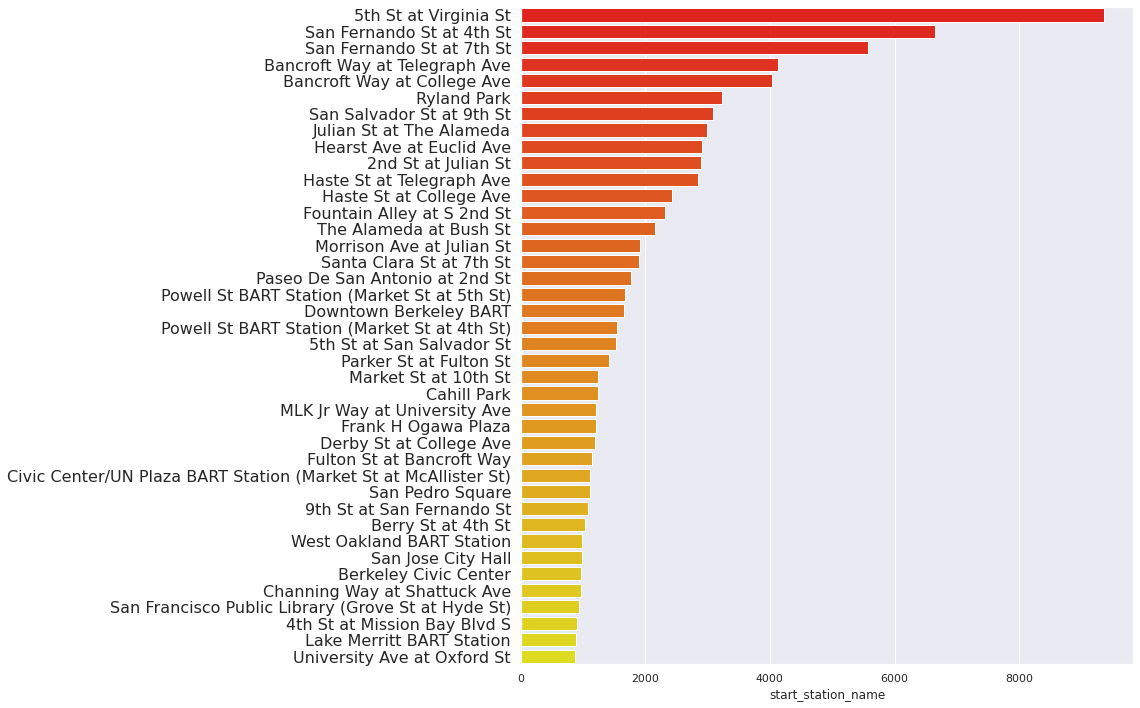

In [101]:
a = df[df.bike_share_for_all_trip == "Yes"].start_station_name.value_counts()[:40]
sns.barplot(a, a.index, palette='autumn')
sns.set(rc={'figure.figsize':(16, 10)})
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

- Top ten locations don't match with neither the Customers nor the Subscribers locations.

## Multivariate Exploration

## Distribution of Start Day and Start Hour for Customers

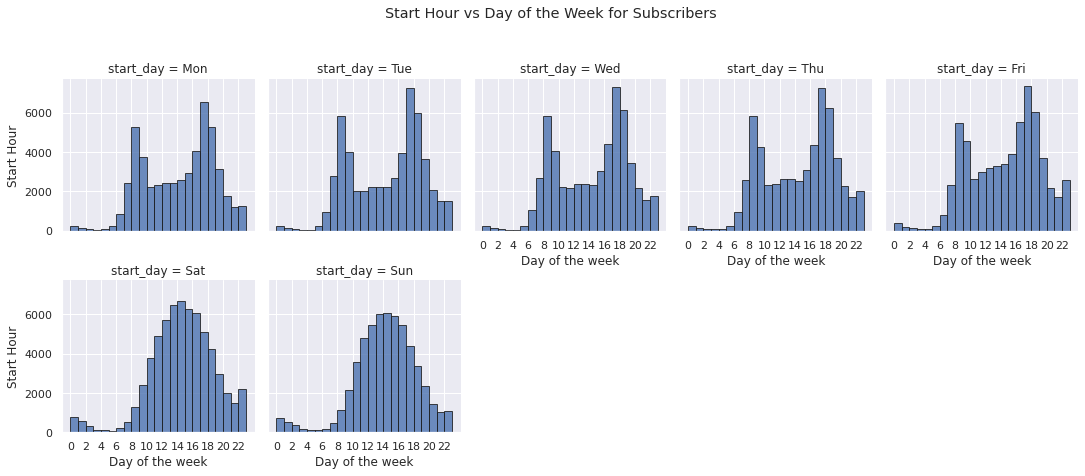

In [108]:
a = sns.FacetGrid(df[df.user_type=='Customer'], col='start_day', col_wrap=5, col_order=days, sharey=True)
a = (a.map(plt.hist, 'start_hour', bins=np.arange(0, 24, 1), color='b', alpha=0.8, edgecolor='k').set_axis_labels("Day of the week", "Start Hour"))
a.set(xticks=np.arange(0, 24, 2))
plt.suptitle("Start Hour vs Day of the Week for Subscribers", y=1.1)
plt.show()

- During weekdays start hour starts late for rentals.
- During weekends demands peaks at the afternoon till the evening. 
- Customers could be tourists. 

## Heat map of Time vs Subscribers Rentals.

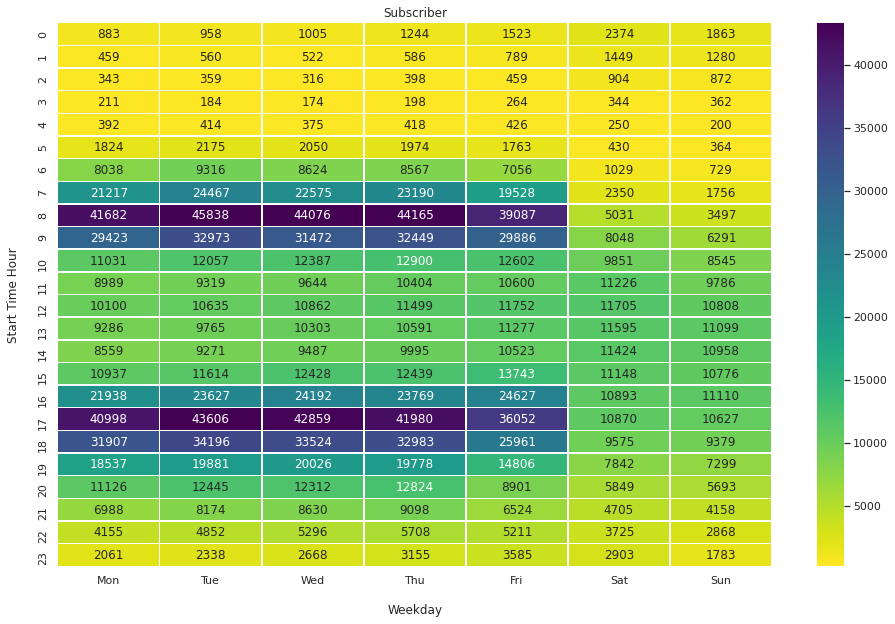

In [103]:
a = df[df.user_type=='Subscriber'].groupby(['start_hour', 'start_day'])['bike_id'].size().reset_index().pivot('start_hour', 'start_day', 'bike_id')[days];
heat_map = sns.heatmap(a, cmap = 'viridis_r', annot=True, robust=True, fmt='d', linewidths=.5)
plt.title('Subscriber', y=1)
plt.xlabel('Weekday', labelpad = 18)
plt.ylabel('Start Time Hour',  labelpad = 18)
plt.show()

- Most rental during 7-9 am and 4-6 pm. 
- less rental during weekends (sat and sun)

## Locations

In [111]:
df2 = df[['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name', 
             'end_station_latitude', 'end_station_longitude', 'user_type', 'bike_share_for_all_trip']]

In [112]:
df2.start_station_latitude, df2.start_station_longitude = df2.start_station_latitude.astype(str), df2.start_station_longitude.astype(str)
df2.end_station_latitude, df2.end_station_longitude = df2.end_station_latitude.astype(str), df2.end_station_longitude.astype(str)

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Top 40 locations of rentals for Customers

In [214]:
from IPython.display import Image

In [201]:
fm = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)
c = df2[df2.user_type == 'Customer'].start_station_latitude.value_counts()[:40].index
test = df2[df2.user_type == 'Customer']
d = test.start_station_longitude.value_counts()[:40].index

In [202]:
for a, b in zip(c, d):
    pop = df2[df2.start_station_latitude==a].start_station_name.unique()[0]
    tooltip = 'Click me!'
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip='click here', icon=icon).add_to(fm)
map_cust_file = 'map_customers.html'
map_cust_img = 'map_customers.png'
fm.save(map_cust_file) 

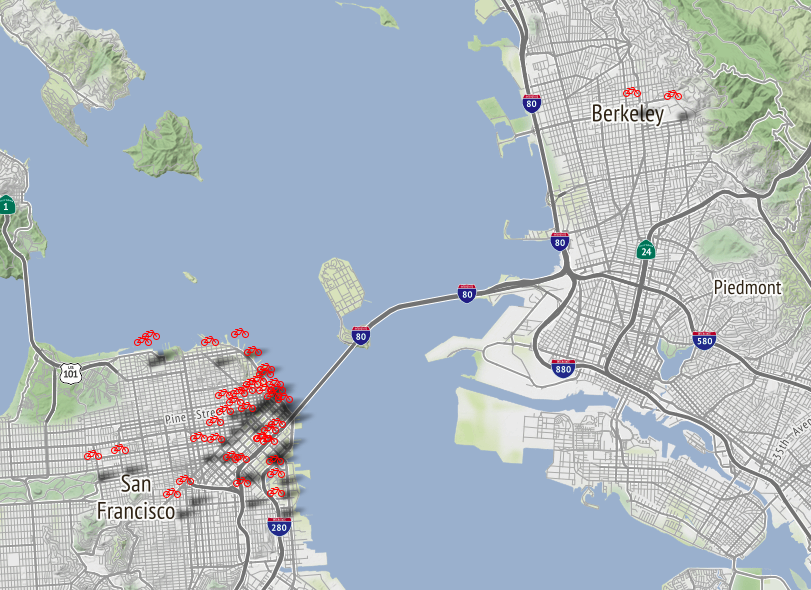

In [213]:
Image(filename=map_cust_img)

- Most of the top 40 stations are in san francisco

## Top 40 locations of rentals for Subscribers

In [215]:
fm = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)
c = df2[df2.user_type == 'Subscriber'].start_station_latitude.value_counts()[:40].index
test = df2[df2.user_type == 'Subscriber']
d = test.start_station_longitude.value_counts()[:40].index

In [216]:
for a, b in zip(c, d):
    pop = df2[df2.start_station_latitude==a].start_station_name.unique()[0]
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip='click here', icon=icon).add_to(fm)
map_subs_file = 'map_subscribers.html'
map_subs_img = 'map_subscribers.png'
fm.save(map_cust_file) 

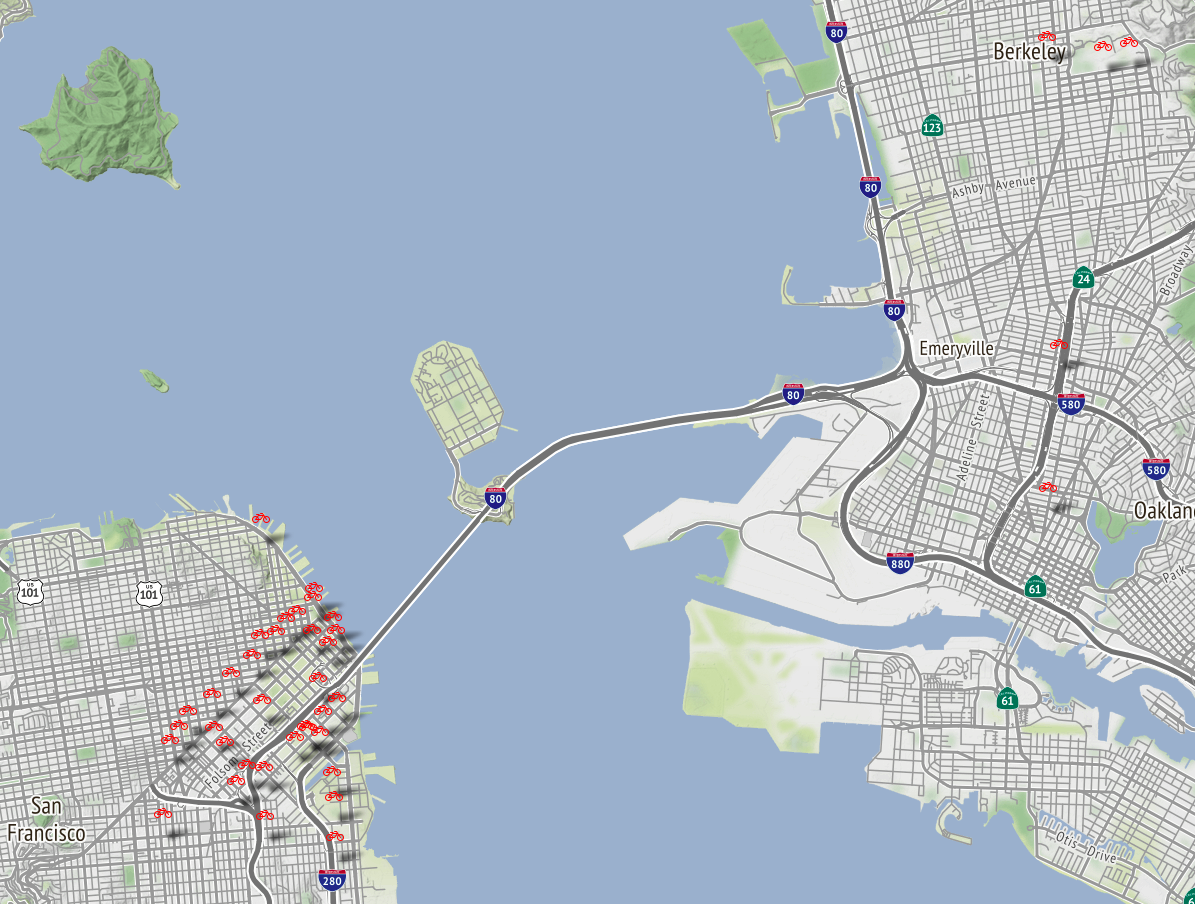

In [217]:
Image(filename=map_subs_img)

- Most of the top 40 stations are in san francisco and it is less random than customers renting locations

## Top 40 locations of rentals for Bike Share for all users

In [220]:
fm = folium.Map(location=[37.8272, -122.2913], tiles='Stamen Terrain', zoom_start=10)
c = df2[df2.bike_share_for_all_trip=='Yes'].start_station_latitude.value_counts()[:40].index
d = df2[df2.bike_share_for_all_trip=='Yes'].start_station_longitude.value_counts()[:40].index
for a, b in zip(c, d):
    pop = df2[df2.start_station_latitude==a].start_station_name.unique()[0]
    icon=folium.Icon(color='black', icon='bicycle', icon_color="red", prefix='fa', icon_size=(0, 0))
    folium.Marker(location = [float(a), float(b)], popup=pop, tooltip='click here', icon=icon).add_to(fm)

map_bikeshare_file = 'map_bikeshare.html'
map_bikeshare_img = 'map_bikeshare.png'
fm.save(map_cust_file) 

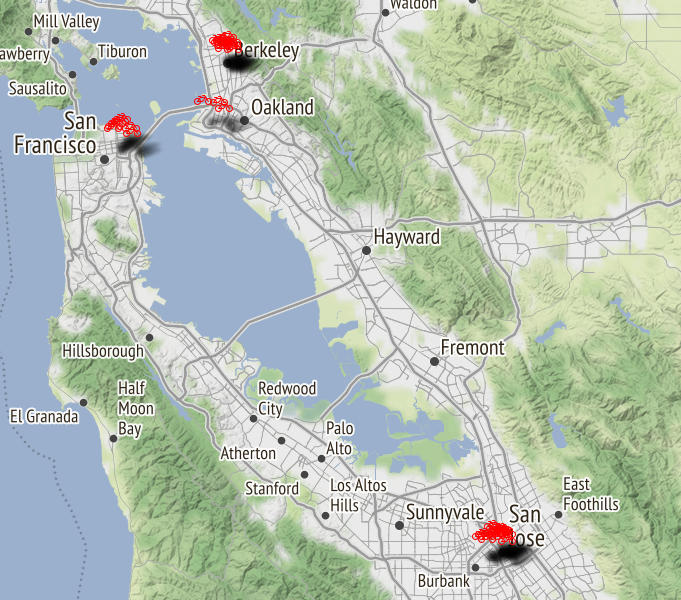

In [221]:
Image(filename=map_bikeshare_img) 

- No single concentrated area, and there is some distribution here.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- There is a relationship between time of rental and user type. 
- There is a relationship between Distance travelled, Rental Duration for Subscribers. 
- There is a relationship between user type and start station from where bikes are rented. 

### Were there any interesting or surprising interactions between features?

- Subscribers rented the bikes for less time than customers but travelled more they seems to be in hurry.

- Relationship between start Day, start Hour and user type which give a hint about the nature of the user type.
- subscribers seems to be students and employees and customers seems to be tourists. 

## Summary
- Subscribers uses bikes as transportation option. 

- Subscribers are regular customers who are making rides to/from work or school, renting a bike at 7-9am and 4-6pm on weekdays

- Customers rent bikes for exploring the Bay area and they could be tourists. 

- Customers could be tourists who use bikes to explore the Bay area mainly on weekends.